### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [14]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-07 20:55:30--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.05s   

2025-11-07 20:55:30 (1.79 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [ ]:
!pip install pandas
import pandas as pd
df = pd.read_csv("test.csv")
print(df)

                                                  text     label  \
0    Trying to have a conversation with my dad abou...  negative   
1    #latestnews 4 #newmexico #politics + #nativeam...   neutral   
2    @user You are a stand up guy and a Gentleman V...  positive   
3    @user @user @user Looks like Flynn isn't too p...  negative   
4    perfect pussy clips #vanessa hudgens zac efron...   neutral   
..                                                 ...       ...   
865  "All 11 of the UK’s most senior judges will ta...   neutral   
866     @user #hatchimals #BlackFriday Count me in! 🍀   positive   
867  American Radical Christianity seems to love ha...  negative   
868  #ICYMI The #NBAwards winners for 2016 wereThe ...   neutral   
869  We would totally accept that challenge…if it w...  positive   

            source  
0    sem_eval_2017  
1    sem_eval_2017  
2    sem_eval_2017  
3    sem_eval_2017  
4    sem_eval_2017  
..             ...  
865  sem_eval_2017  
866  sem_eval_2

3. Извлечь столбец с текстами (макс. балл == 1)

In [ ]:
!pip install pandas
import pandas as pd
df = pd.read_csv("test.csv")
text = df["text"].tolist()
print(text)

['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ', '#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ', '@user You are a stand up guy and a Gentleman Vice President Pence ', "@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ", 'perfect pussy clips #vanessa hudgens zac efron naked ', "i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ", '@user for al the crying you do about how middle America is left out-they have twice as much voting power ', 'Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. ', 'Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News ', 'Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @user ', 'Presentin

4. Построить Bag-of-Words (макс. балл == 3)

Исходные тексты: ['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ', '#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ', '@user You are a stand up guy and a Gentleman Vice President Pence ', "@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ", 'perfect pussy clips #vanessa hudgens zac efron naked ', "i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ", '@user for al the crying you do about how middle America is left out-they have twice as much voting power ', 'Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. ', 'Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News ', 'Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @u

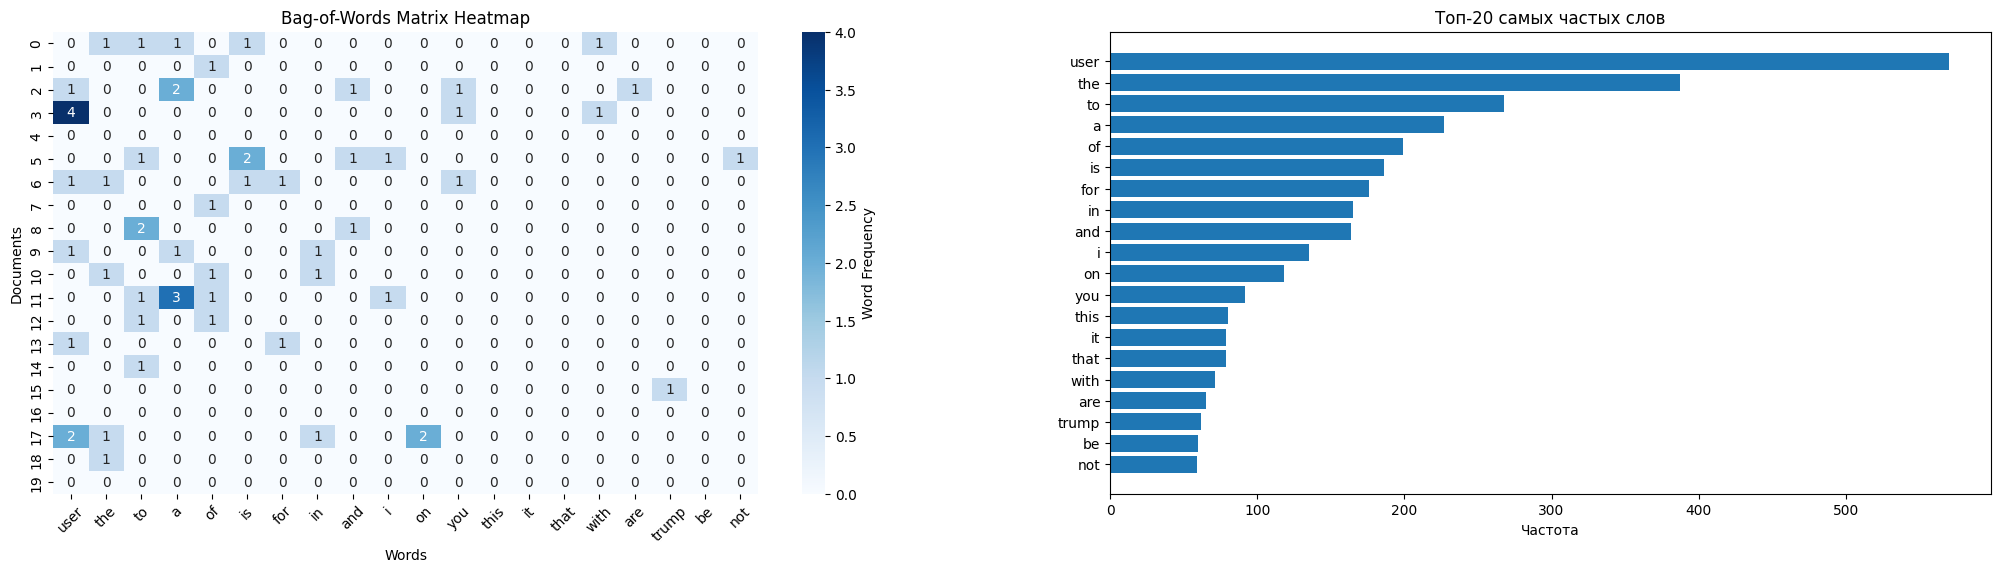

In [ ]:
!pip install pandas
import pandas as pd
df = pd.read_csv("test.csv")
texts = df["text"].tolist()

!pip install gensim
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
# Чистим текст
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
processed_texts = [preprocess_text(t) for t in texts]
print(f"Исходные тексты: {texts}")
print(f"Обработанные тексты: {processed_texts}")
print("")
tokenized_docs = [doc.lower().split() for doc in processed_texts]
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")
print("")

vectorizer = CountVectorizer(
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]+\b',
)
bow_matrix = vectorizer.fit_transform(processed_texts)
feature_names = vectorizer.get_feature_names_out()
print(f"Размер матрицы: {bow_matrix.shape}")
print("")
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)

word_frequencies = np.array(bow_matrix.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({
   'word': feature_names,
    'frequency': word_frequencies
}).sort_values('frequency', ascending=False)
print("Вот таблица частот слов:")
print(word_freq_df.head)
print("")
print("Вот 20 самых частотных:")
print(word_freq_df.head(20))
print("")

top_words = word_freq_df.head(20)['word'].values
doc_indices = range(20)

bow_dense = bow_matrix.toarray()
matrix = bow_dense[doc_indices][:, [np.where(feature_names == word)[0][0] for word in top_words]]

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=top_words,
            yticklabels=doc_indices,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')
# Ищем и визуализируем самые частые слова
plt.subplot(1, 2, 2)
top_20_words = word_freq_df.head(20)
plt.barh(range(len(top_20_words)), top_20_words['frequency'])
plt.yticks(range(len(top_20_words)), top_20_words['word'])
plt.xlabel('Частота')
plt.title('Топ-20 самых частых слов')
plt.gca().invert_yaxis()


5. Построить TF-IDF (макс. балл == 5)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import math
import re
from io import StringIO
from pprint import pprint
!pip install gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel

df = pd.read_csv('test.csv')
texts = df['text'].tolist()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
processed_texts = [preprocess_text(text) for text in texts]
tokenized_docs = [doc.split() for doc in processed_texts]
dictionary = corpora.Dictionary(tokenized_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

tfidf_model = TfidfModel(bow_corpus, smartirs='ntc')
tfidf_corpus = tfidf_model[bow_corpus]

def analyze_tfidf_components(tfidf_corpus, dictionary):
    dense_matrix = np.zeros((len(tfidf_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(tfidf_corpus):
        for word_idx, score in doc:
            dense_matrix[doc_idx, word_idx] = score
    return dense_matrix
tfidf_matrix = analyze_tfidf_components(tfidf_corpus, dictionary)

def components(tokenized_docs, dictionary):

    N = len(tokenized_docs)

    tf_per_doc = []
    for doc in tokenized_docs:
        doc_length = len(doc)
        tf_doc = defaultdict(float)
        word_count = defaultdict(int)
        for word in doc:
            word_count[word] += 1
        for word, count in word_count.items():
            tf_doc[word] = count/doc_length
        tf_per_doc.append(tf_doc)

    df = defaultdict(int)
    for doc in tokenized_docs:
        unique_words = set(doc)
        for word in unique_words:
            if word in dictionary.token2id:
                df[word] += 1

    idf = {}
    for word in dictionary.token2id:
        df_word = df.get(word, 0)
        idf[word] = math.log((N+1)/(df_word+1))+1

    return tf_per_doc, df, idf

tf_per_doc, df_dict, idf_dict = components(tokenized_docs, dictionary)

analysis = []
for id, i in dictionary.items():
    word = i
    df_value = df_dict.get(word, 0)
    idf_value = idf_dict.get(word, 0)

    manual_tfidf = []
    for doc_idx, tf_doc in enumerate(tf_per_doc):
        tf_value = tf_doc.get(word, 0)
        tf_idf = tf_value * idf_value
        manual_tfidf.append(tf_idf)

    analysis.append({
        'word_id': id,
        'word': word,
        'term_frequency': tf_value,
        'document_frequency': df_value,
        'inverse_document_frequency': idf_value,
        'tf-idf': manual_tfidf
        })

analysis_df = pd.DataFrame(analysis).sort_values('inverse_document_frequency', ascending=False)
analysis_df.to_csv('tf-idf_components.csv', index=False, encoding='utf-8')

print("Результаты сохранены как tf-idf_components.csv")


Результаты сохранены как tf-idf_components.csv


##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```